In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from IPython.display import Image
from sklearn import metrics
import random

In [4]:
face_embeddings = pd.read_pickle('faces_embeddings.pkl')

In [5]:
face_embeddings.shape

(13195, 4)

## Quantity of Pictures Histogram

In [17]:
qtd_images = face_embeddings[["name", "file"]].groupby('name').count()

In [18]:
qtd_images = qtd_images.loc[qtd_images['file'] > 3]
qtd_images = qtd_images.loc[qtd_images['file'] <= 100]

In [19]:
qtd_images.shape

(603, 1)

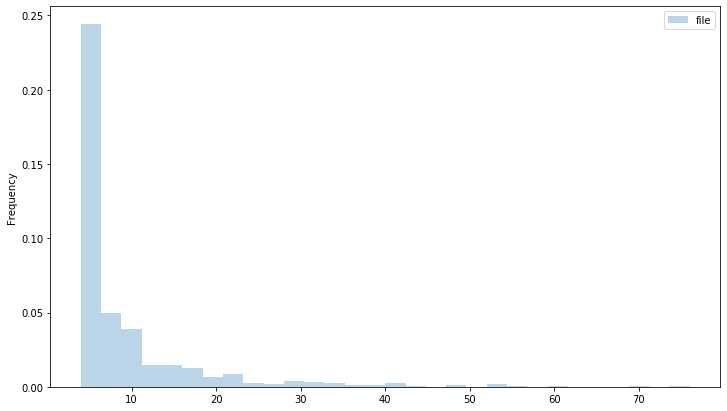

In [20]:
qtd_images.plot.hist(alpha=0.3, density = True, figsize=(12,7), bins=30)

## Selecting People

In [21]:
people = qtd_images.index.values
len(people)

603

In [22]:
random.shuffle(people)
people = people[:513]
people

array(['Jelena_Dokic', 'Bulent_Ecevit', 'Mian_Khursheed_Mehmood_Kasuri',
       'Mahathir_Mohamad', 'Luis_Ernesto_Derbez_Bautista', 'Donald_Fehr',
       'Larry_Brown', 'Hillary_Clinton', 'Tony_Shalhoub', 'David_Stern',
       'Bertie_Ahern', 'Paul_Tagliabue', 'Gwyneth_Paltrow', 'Hitomi_Soga',
       'Diana_Krall', 'Hu_Jintao', 'Rob_Lowe', 'Jeb_Bush',
       'Claudia_Pechstein', 'Raoul_Ruiz', 'Rainer_Schuettler',
       'Bill_Simon', 'Jonathan_Edwards', 'Bill_McBride', 'Antony_Leung',
       'Victoria_Clarke', 'Jong_Wook_Lee', 'Abdullah_Gul', 'George_Lopez',
       'Goldie_Hawn', 'Julianne_Moore', 'Abdullah', 'Tiger_Woods',
       'Justin_Leonard', 'Natalie_Maines', 'Joe_Torre', 'Derek_Jeter',
       'Tom_Ridge', 'Jack_Straw', 'Michael_Powell', 'Jennifer_Connelly',
       'Thabo_Mbeki', 'John_Bolton', 'Ray_Romano', 'Elizabeth_Smart',
       'Vicente_Fox', 'King_Abdullah_II', 'Luiz_Inacio_Lula_da_Silva',
       'Laura_Linney', 'David_Hyde_Pierce', 'Joseph_Biden',
       'Kim_Clijsters',

In [23]:
face_embeddings = face_embeddings.loc[face_embeddings['name'].isin(people)]

## Features Separation

In [24]:
features = pd.DataFrame(face_embeddings['embeddings'].values.tolist(), index = face_embeddings.index)

In [25]:
features.head()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
26,0.000000,0.283194,0.000000,0.000000,0.050406,0.253373,0.007635,2.563490,3.687375,15.876841,...,0.367352,0.000000,0.219032,2.287213,0.250101,5.242637,0.143227,1.330379,0.787834,0.301615
27,0.000000,0.253188,0.059707,0.154121,0.583004,0.399609,0.000000,2.631527,4.466015,6.866147,...,0.000000,0.367504,0.000000,4.636008,0.006832,3.548683,0.174027,0.005270,0.466558,0.597577
28,0.364766,0.000000,0.027437,0.225057,0.211103,1.307380,0.061673,4.282049,5.813432,3.161975,...,0.047873,0.410506,0.000000,2.098098,0.000000,0.655787,9.962486,0.000000,0.013727,2.339517
29,0.068722,0.016572,0.097777,0.743428,0.078604,1.253470,0.136796,4.320780,1.006925,9.899343,...,0.514603,0.471674,0.000000,3.579835,0.679909,2.015061,5.756155,0.000000,0.040762,3.247395
30,0.245405,0.158042,0.636484,0.000000,0.000000,1.058665,0.408246,0.300384,1.629689,10.998335,...,0.000000,4.656051,4.392201,1.897271,0.862031,3.673261,0.186188,0.000000,1.681356,0.070206


## Scaling

In [26]:
scaler = MinMaxScaler()

features_scaled = scaler.fit_transform(features)

In [27]:
features_scaled

array([[0.        , 0.0141278 , 0.        , ..., 0.07948997, 0.04264834,
        0.01863606],
       [0.        , 0.01263084, 0.0033503 , ..., 0.00031485, 0.02525647,
        0.03692291],
       [0.01936253, 0.        , 0.00153958, ..., 0.        , 0.00074308,
        0.14455325],
       ...,
       [0.00357972, 0.        , 0.00176614, ..., 0.03148307, 0.        ,
        0.01487561],
       [0.00303685, 0.00078672, 0.0108758 , ..., 0.15093134, 0.        ,
        0.        ],
       [0.00348493, 0.00218152, 0.00378447, ..., 0.00069207, 0.        ,
        0.01960948]])

## Silhuoette Analysis

In [28]:
import silhouette_paulo

In [ ]:
silhouette_paulo.analyze(features_scaled, [i+2 for i in range(len(people)*2)], show_individual_graphs = False)

## Clustering

In [30]:
model = KMeans(n_clusters=513, verbose = 0, random_state=42)
#model = MeanShift(bandwidth = len(people))

In [31]:
cluster_labels = model.fit_predict(features_scaled)
#cluster_labels = kmeans.fit_predict(features)

In [32]:
features['Cluster'] = cluster_labels
features.head()

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,Cluster
26,0.000000,0.283194,0.000000,0.000000,0.050406,0.253373,0.007635,2.563490,3.687375,15.876841,...,0.000000,0.219032,2.287213,0.250101,5.242637,0.143227,1.330379,0.787834,0.301615,409
27,0.000000,0.253188,0.059707,0.154121,0.583004,0.399609,0.000000,2.631527,4.466015,6.866147,...,0.367504,0.000000,4.636008,0.006832,3.548683,0.174027,0.005270,0.466558,0.597577,409
28,0.364766,0.000000,0.027437,0.225057,0.211103,1.307380,0.061673,4.282049,5.813432,3.161975,...,0.410506,0.000000,2.098098,0.000000,0.655787,9.962486,0.000000,0.013727,2.339517,409
29,0.068722,0.016572,0.097777,0.743428,0.078604,1.253470,0.136796,4.320780,1.006925,9.899343,...,0.471674,0.000000,3.579835,0.679909,2.015061,5.756155,0.000000,0.040762,3.247395,409
30,0.245405,0.158042,0.636484,0.000000,0.000000,1.058665,0.408246,0.300384,1.629689,10.998335,...,4.656051,4.392201,1.897271,0.862031,3.673261,0.186188,0.000000,1.681356,0.070206,409


## Analyzing Clusters

In [33]:
features_scaled = pd.DataFrame(features_scaled, index = features.index)
features_scaled['Cluster'] = cluster_labels
features_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,Cluster
26,0.000000,0.014128,0.000000,0.000000,0.002412,0.014317,0.000493,0.227194,0.270595,0.793366,...,0.000000,0.013489,0.113515,0.011626,0.300021,0.007724,0.079490,0.042648,0.018636,409
27,0.000000,0.012631,0.003350,0.009952,0.027900,0.022580,0.000000,0.233224,0.327735,0.343102,...,0.017681,0.000000,0.230086,0.000318,0.203081,0.009385,0.000315,0.025256,0.036923,409
28,0.019363,0.000000,0.001540,0.014533,0.010102,0.073875,0.003980,0.379505,0.426615,0.158004,...,0.019750,0.000000,0.104129,0.000000,0.037529,0.537253,0.000000,0.000743,0.144553,409
29,0.003648,0.000827,0.005486,0.048006,0.003762,0.070828,0.008827,0.382938,0.073892,0.494670,...,0.022692,0.000000,0.177668,0.031605,0.115316,0.310416,0.000000,0.002207,0.200649,409
30,0.013027,0.007884,0.035714,0.000000,0.000000,0.059821,0.026343,0.026622,0.119594,0.549587,...,0.224005,0.270501,0.094162,0.040071,0.210210,0.010041,0.000000,0.091018,0.004338,409


In [34]:
features_names = features.copy()

In [35]:
features_names['name'] = face_embeddings['name']

In [36]:
people_clusters = features_names[['name', 'Cluster']].copy()

In [37]:
people_clusters['qtd'] = cluster_labels

In [38]:
qtd_clusters = people_clusters.groupby(['Cluster', 'name']).count()
qtd_clusters

qtd
Cluster name                   
0       Carlos_Vives          1
1       Franz_Muentefering    1
        Vicente_Fox           1
2       Frank_Solich          5
3       John_Bolton          16
...                         ...
508     Kim_Jong-Il           4
509     Lleyton_Hewitt       20
510     Michelle_Kwan         7
511     Clare_Short           4
512     Tony_Shalhoub         4

[754 rows x 1 columns]

In [39]:
qtd_clusters = people_clusters.groupby(['name','Cluster']).count()
qtd_clusters

qtd
name            Cluster     
Aaron_Peirsol   452        4
Abdoulaye_Wade  406        4
Abdullah        290        4
Abdullah_Gul    144       18
                483        1
...                      ...
Yu_Shyi-kun     490        4
Zhang_Ziyi      204        4
Zhu_Rongji      179        9
Zinedine_Zidane 245        6
Zoran_Djindjic  330        4

[754 rows x 1 columns]

In [40]:
features_scaled.groupby('Cluster', axis = 0).std().transpose().describe()

Cluster,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,512
count,0.0,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,...,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000
mean,NaN,0.059575,0.041316,0.048251,0.043372,0.055282,0.046333,0.071816,0.054850,0.054794,...,0.063802,0.063537,0.058349,0.071146,0.041879,0.035187,0.062731,0.049227,0.042274,0.049020
std,NaN,0.078187,0.043583,0.046122,0.040639,0.045253,0.040920,0.065390,0.045900,0.054839,...,0.071953,0.065066,0.058741,0.060775,0.045478,0.044460,0.056081,0.053839,0.049436,0.057690
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.004265,0.006316,0.012398,0.010469,0.017400,0.013386,0.019899,0.017266,0.010177,...,0.007735,0.010535,0.012203,0.020389,0.005061,0.000894,0.017227,0.007122,0.003819,0.005657
50%,NaN,0.026194,0.027566,0.033569,0.030298,0.044684,0.035542,0.053877,0.043092,0.037866,...,0.038871,0.043576,0.039864,0.056411,0.026266,0.017254,0.046704,0.032954,0.024504,0.027108
75%,NaN,0.084959,0.062265,0.071737,0.067043,0.084034,0.069710,0.105843,0.083615,0.085499,...,0.096679,0.098479,0.090096,0.106674,0.065563,0.055752,0.097557,0.074571,0.064225,0.075116
max,NaN,0.645501,0.317070,0.286825,0.210769,0.208414,0.296122,0.373872,0.243937,0.308978,...,0.442710,0.409816,0.347928,0.341898,0.265856,0.306348,0.316849,0.388473,0.355963,0.416680


In [41]:
qtd_clusters.sum()

qtd    4739
dtype: int64

## Evaluation Classification
https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

In [42]:
dt_eval = features_names[['Cluster', 'name']].copy()

In [43]:
dt_eval.shape

(4739, 2)

In [44]:
labels_true = dt_eval['name'].values


In [45]:
labels_pred = dt_eval['Cluster'].values

In [46]:
metrics.homogeneity_score(labels_true,labels_pred)

0.9625251726740642